### Bag of Words
In Bag of word representation we have more zeros in the sparse matrices. The size of the matrix  will be increased based on the total number of words in the corpus. In real world applications corpus will contain thousands of words. 

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
exam_sentence = ["In Bag of word representation we have more zeros in the sparse matrices.",
                 "The size of the matrix  will be increased based on the total number of words in the corpus.",
                 "In real world applications corpus will contain thousands of words."]

countvectorizer = CountVectorizer()
X = countvectorizer.fit_transform(exam_sentence)
result = X.toarray()
print(result)

[[0 1 0 0 0 0 1 2 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1]
 [0 0 1 1 0 1 0 1 1 0 1 0 1 2 1 0 0 1 0 4 0 1 0 1 0 1 0 0]
 [1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0]]


### TF-IDF
This is a statistical method to find how important a word is to a document all over other documents.
#### TF
The full form of TF is Term Frequency (TF). In TF , we are giving some scoring for each word or token based on the frequency of that word. The frequency of a word is dependent on the length of the document. Means in large size of document a word occurs more than a small or medium size of the documents. 

So to overcome this problem we will divide the frequency of a word with the length of the document (total number of words) to normalize.By using this technique also, we are creating a sparse matrix with frequency of every word.

#### Formula to calculate Term Frequency (TF)

TF = no. of times term occurrences in a document / total number of words in a document
#### IDF
The full form of IDF is Inverse Document Frequency. Here also we are assigning  a score value  to a word , this scoring value explains how a word is rare across all documents. Rarer words have more IDF score.

#### Formula to calculate Inverse Document Frequency (IDF) :-

IDF = log base e (total number of documents / number of documents which are having term )
Formula to calculate complete TF-IDF value is 

#### TF - IDF  = TF * IDF 
TF-IDF value will be increased based on frequency of the word in a document. Like Bag of Words in this technique also we can not get any semantic meaning for words.

But this technique is mostly used for document classification and also successfully used by search engines like Google, as a ranking factor for content. 

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(exam_sentence)
features_name = vectorizer.get_feature_names()
print(f"Feature name \n{features_name}")
matrix = vectors.todense()
denselist = matrix.tolist()

df = pd.DataFrame(denselist, columns=features_name)
print(df)

Feature name 
['applications', 'bag', 'based', 'be', 'contain', 'corpus', 'have', 'in', 'increased', 'matrices', 'matrix', 'more', 'number', 'of', 'on', 'real', 'representation', 'size', 'sparse', 'the', 'thousands', 'total', 'we', 'will', 'word', 'words', 'world', 'zeros']
   applications       bag     based        be   contain    corpus      have  \
0      0.000000  0.297186  0.000000  0.000000  0.000000  0.000000  0.297186   
1      0.000000  0.000000  0.219615  0.219615  0.000000  0.167023  0.000000   
2      0.366794  0.000000  0.000000  0.000000  0.366794  0.278956  0.000000   

         in  increased  matrices  ...    sparse       the  thousands  \
0  0.351046   0.000000  0.297186  ...  0.297186  0.226018   0.000000   
1  0.129708   0.219615  0.000000  ...  0.000000  0.668090   0.000000   
2  0.216634   0.000000  0.000000  ...  0.000000  0.000000   0.366794   

      total        we      will      word     words     world     zeros  
0  0.000000  0.297186  0.000000  0.297186  0.

### Word2Vec
By using Bag-of-words and TF-IDF techniques we can not capture the meaning or relation of the words from vectors. Word2vec constructs such vectors called embeddings.

Word2vec model takes input as a large size of corpus and produces output to vector space. This vector space size may be in hundred of dimensionality. Each word vector will be placed on this vector space.

In vector space whatever words share context commonly in a corpus that are closer to each other. Word vector having positions of corresponding words in a vector space.

The Word2vec method learns all those types of relationships of words while building a model. For this purpose word2vec uses 2 types of methods. There are

Skip-gram
CBOW (Continuous Bag of Words)

The Word2vec model will capture relationships of words with the help of window size by using skip-gram and CBow methods.

 #### Word2vec models predict the context words of a center word using skip-gram method. Skip-gram works well with a small dataset and identifies rare words really well
 
 #### Here we are taking context words as input and predicting the center word within the window. Another difference from skip gram method is, It was working faster and better representations for most frequency words.
 
 

In [4]:
!pip install ipynb

In [6]:
from ipynb.fs.full.preprocessing import clean_tokenizer, comment_preprocessing

In [18]:
# !pip install --upgrade gensim

In [18]:
#Word2Vec with gensim
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
with open("positive10k.txt", "r", encoding="utf-8") as txt:
    sentences_pos = txt.readlines()
    
print(f"Number of sentences {len(sentences_pos)}")

print(f"First sentence from file is \n{sentences_pos[0]}")

Number of sentences 9999
First sentence from file is 
Very simple and effective way for new words for kids



In [41]:
with open("negative10k.txt", "r", encoding="utf-8") as txt:
    sentences_neg = txt.readlines()
    
print(f"Number of sentences {len(sentences_neg)}")

print(f"First sentence from file is \n{sentences_neg[0]}")

Number of sentences 9769
First sentence from file is 
Ya no I'd ur going make an app make sure it works



In [44]:
len(sentences_pos),len(sentences_neg)

(9999, 9769)

In [45]:
print(f"After preporcessing: {comment_preprocessing(sentences_neg[0])} ")

After preporcessing: make app make sure work 


In [46]:
print(f"After tokenization: {clean_tokenizer(sentences_neg[2])} ")

After tokenization: ['wtf', 'needs', 'way', 'more', 'detail', 'sun', 'should', 'go', 'down', 'at', 'pm', 'not', 'am', 'animals', 'tnt', 'block', 'diamond', 'blocks', 'and', 'all', 'them', 'rare', 'ones', 'a', 'mother', 'fkin', 'save', 'button', 'people', 'planet', 'of', 'cubes', 'has', 'all', 'install', 'it'] 


In [51]:
word_tokenizer = []
for sent in sentences_neg:
    word_tokens = clean_tokenizer(sent)
    word_tokenizer.append(word_tokens)
    
for sent in sentences_pos:
    word_tokens = clean_tokenizer(sent)
    word_tokenizer.append(word_tokens)
    
print(f"First tokenized sentence {word_tokenizer[2]}")

First tokenized sentence ['wtf', 'needs', 'way', 'more', 'detail', 'sun', 'should', 'go', 'down', 'at', 'pm', 'not', 'am', 'animals', 'tnt', 'block', 'diamond', 'blocks', 'and', 'all', 'them', 'rare', 'ones', 'a', 'mother', 'fkin', 'save', 'button', 'people', 'planet', 'of', 'cubes', 'has', 'all', 'install', 'it']


In [52]:
assert len(word_tokenizer) == len(sentences_pos) + len(sentences_neg)

In [53]:
#Building Word2Vec with CBOW method
from gensim.models import Word2Vec

model_cbow = Word2Vec(sentences=word_tokenizer,
                      size =100, #dimension
                      window = 2, #windows size
                      min_count = 2, #minimum count of word to be considered
                      workers = 1, 
                      sg = 0 # 0 for CBOW and 1 for skip gram
                     )

words_chow = list(model_cbow.wv.vocab) #total vocabulary used
print(f"Total no. of words {len(words_chow)}")


Total no. of words 7933


In [54]:
#getting embedding
model_cbow.wv.__getitem__('better')

array([-0.03497426,  0.28784162, -0.5678426 , -0.18670997,  0.35780147,
       -1.4563099 ,  0.6415938 ,  0.21945271,  0.13933024,  1.3074404 ,
        0.12977144, -0.2979356 ,  0.29119852,  0.8187373 ,  0.310095  ,
       -0.41507265,  0.97210205,  0.19325426,  0.35208327, -0.13927764,
        0.13994208, -0.06370437, -0.5024296 , -0.31442177, -0.27797315,
        0.07456168,  0.05173683, -0.47411194,  0.46980804, -0.5076005 ,
        0.18828873,  0.54932135,  0.16736518,  0.28024715,  0.9783758 ,
        0.28588834,  0.6492619 , -0.49313956,  1.6609303 ,  0.8945203 ,
        0.469268  , -0.00200064,  0.4314484 ,  0.30505994,  0.13720986,
       -0.07857633,  0.18703756, -0.06165128, -0.7788961 ,  0.35379723,
        0.31804293, -0.09989331, -0.1059725 ,  0.36067453, -0.18857236,
        0.22507335, -1.0629181 , -1.4178053 ,  0.22114594,  0.26850364,
        0.6051599 , -0.19858487,  0.8580325 , -0.3451524 , -0.9037908 ,
       -1.3075616 ,  0.9857902 ,  0.05811341,  0.6479942 , -0.28

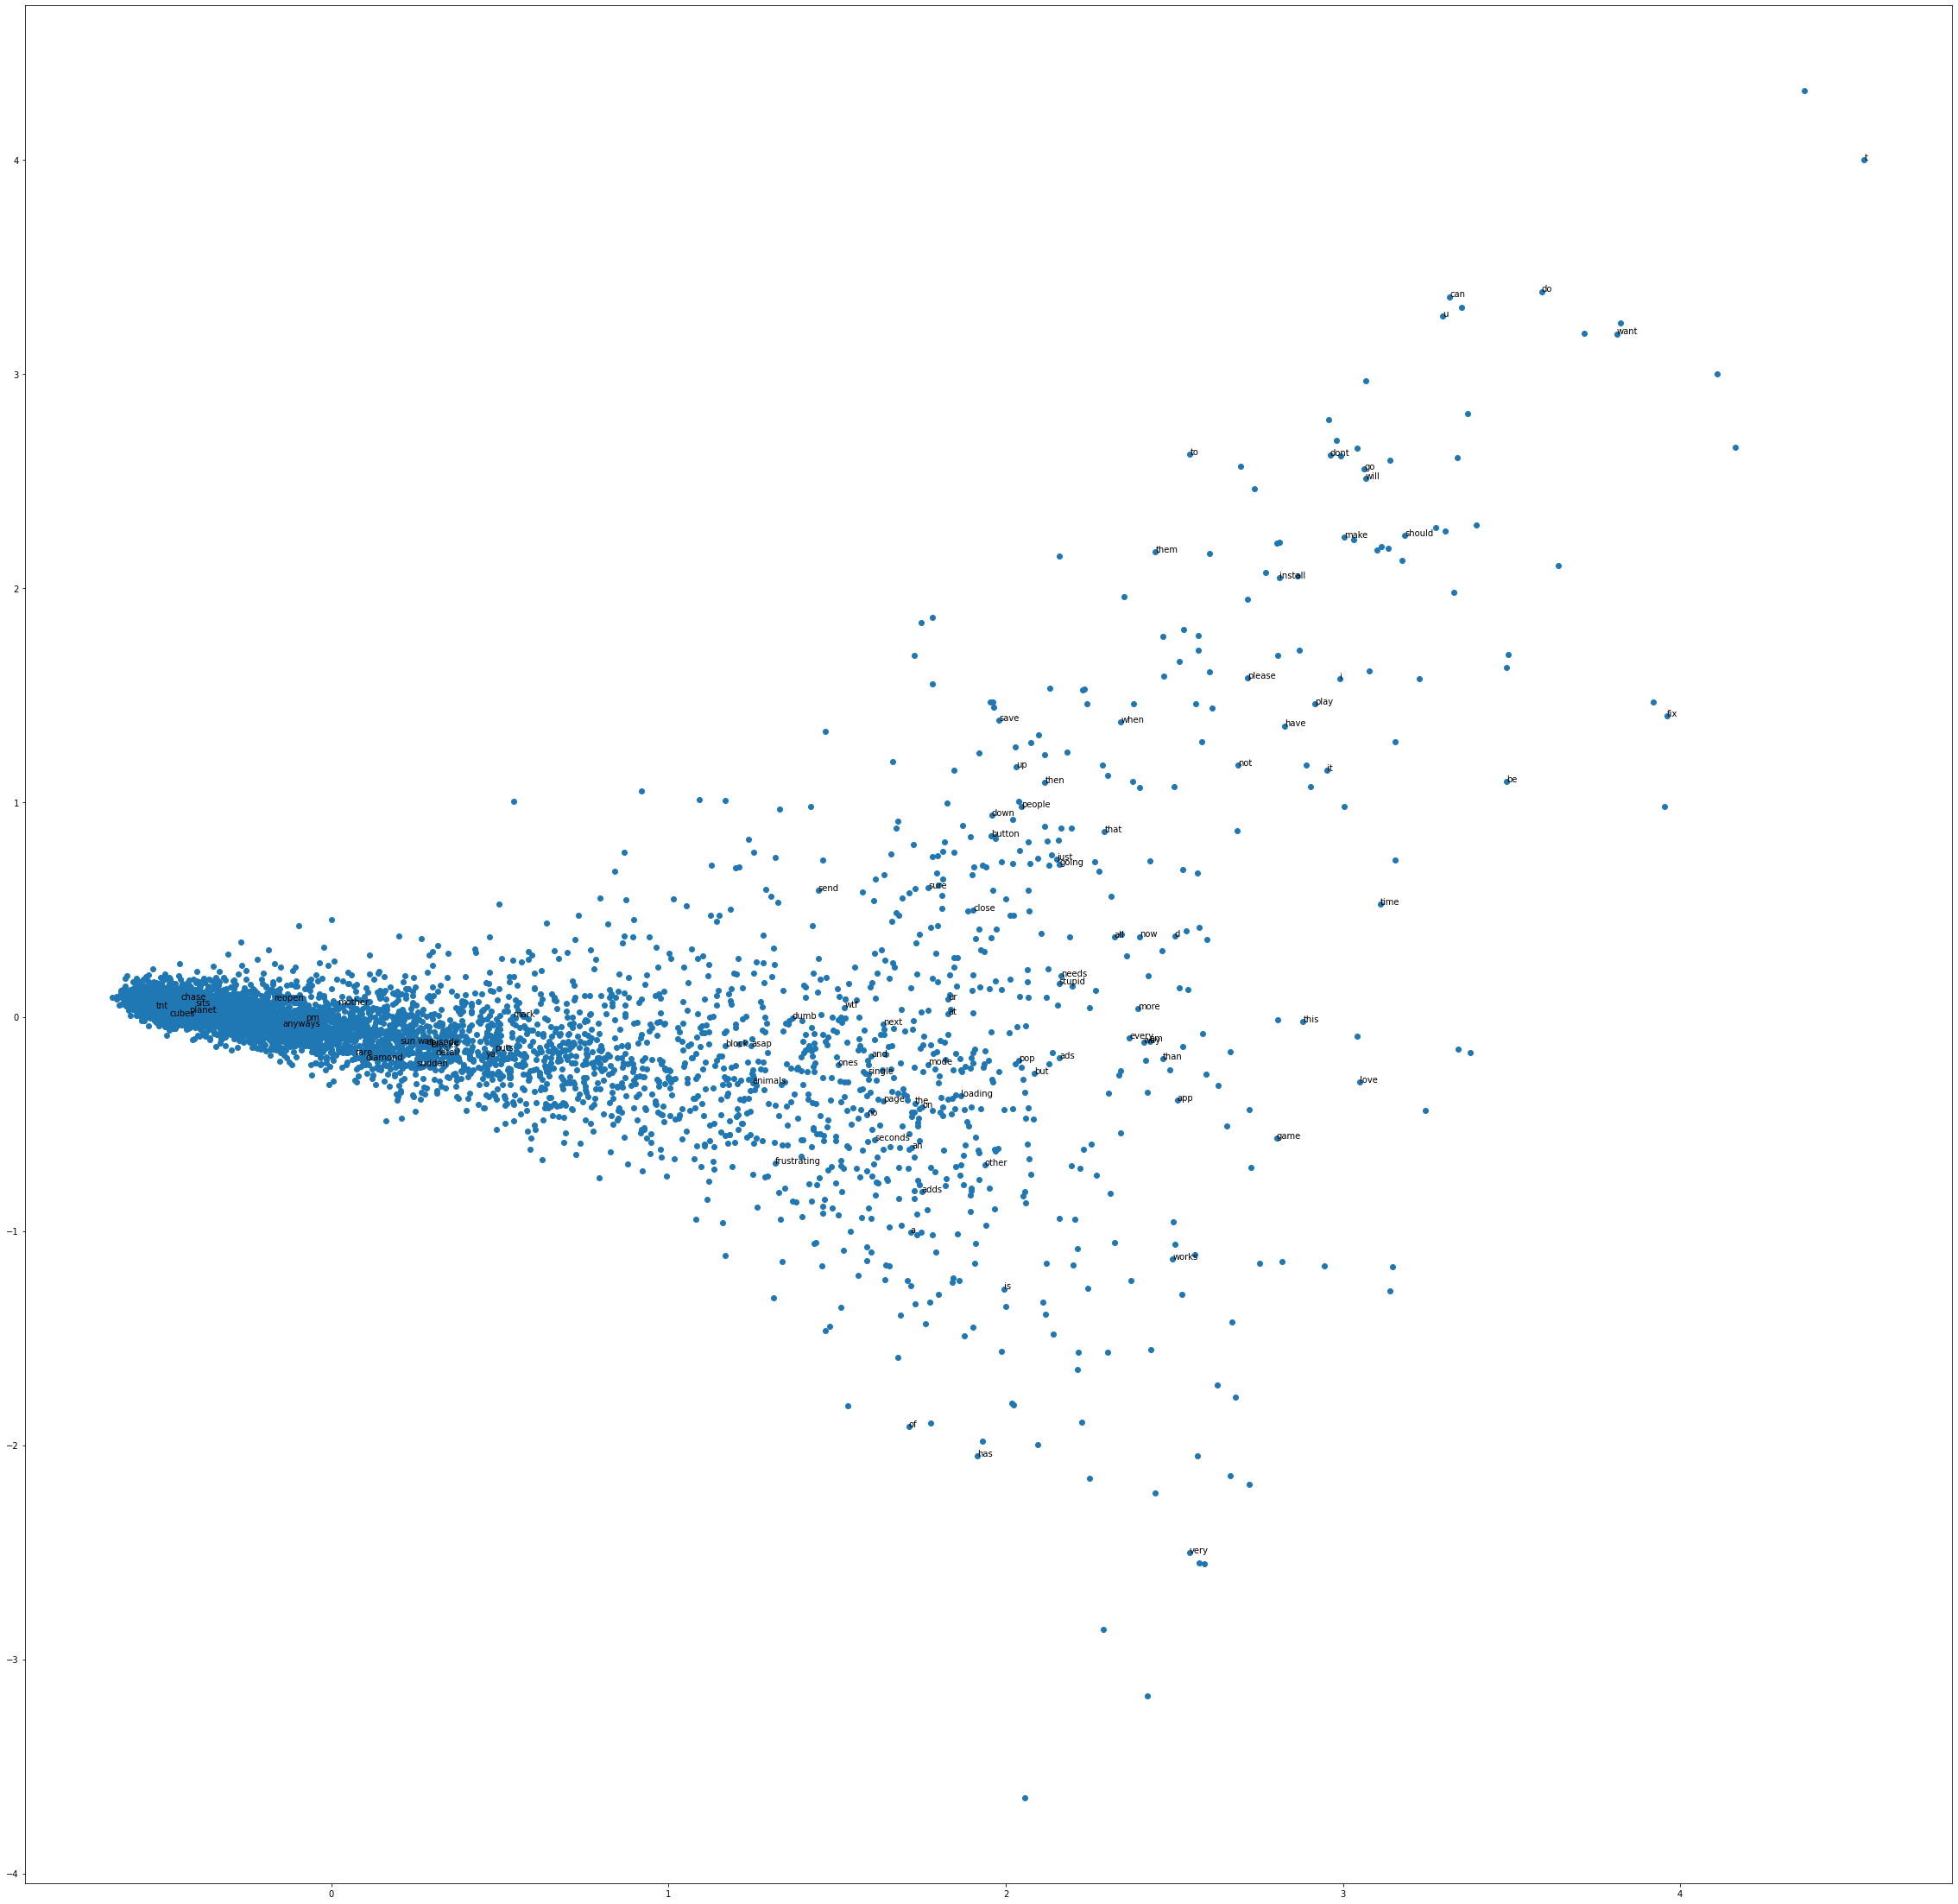

In [55]:
#Visualization 
X = model_cbow.wv.__getitem__(model_cbow.wv.vocab)

#create 2D models
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.figure(figsize=(40,40))
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.vocab)
for i,word in enumerate(words_cbow[:100]):
    plt.annotate(s=word, xy=(result[i,0], result[i,1]))
plt.show()

In [56]:
#word2vec skip-gram method
#Building Word2Vec with CBOW method
from gensim.models import Word2Vec

model_skip = Word2Vec(sentences=word_tokenizer,
                      size =100, #dimension
                      window = 2, #windows size
                      min_count = 4, #minimum count of word to be considered
                      workers = 1, 
                      sg = 1 # 0 for CBOW and 1 for skip gram
                     )

words = list(model_skip.wv.vocab) #total vocabulary used
print(f"Total no. of words {len(words)}")


Total no. of words 4627


In [57]:
#getting embedding
model_skip.wv.__getitem__('better')

array([ 0.08786024,  0.17664109, -0.2642811 , -0.12431192,  0.23450814,
       -0.7165879 ,  0.35438776, -0.03392625, -0.20039572,  0.35910144,
       -0.15653737, -0.26020145, -0.00794631,  0.24710482, -0.4710861 ,
       -0.42468253,  0.3866256 ,  0.12241336, -0.03062826,  0.00647315,
       -0.16232835, -0.02347817, -0.32707497,  0.03852206,  0.1670465 ,
        0.04421338,  0.28468233, -0.5598435 ,  0.1522134 , -0.2215609 ,
       -0.1105019 ,  0.2505092 ,  0.257517  ,  0.58099663,  0.43565336,
        0.19860317,  0.3846324 ,  0.29491505,  0.76738596,  0.2729856 ,
        0.17748062, -0.2686836 ,  0.22803639,  0.4271414 , -0.17018788,
        0.22378965,  0.20240745, -0.07557648, -0.0176118 ,  0.1241923 ,
       -0.22706686, -0.02384505,  0.1356964 ,  0.29063258, -0.20835498,
        0.12325416, -0.58777577, -0.10124791, -0.0944148 ,  0.18908213,
        0.2788279 ,  0.24620348,  0.49621412,  0.00772328, -0.66472304,
       -0.38228053,  0.79934853, -0.18923931,  0.884745  , -0.45

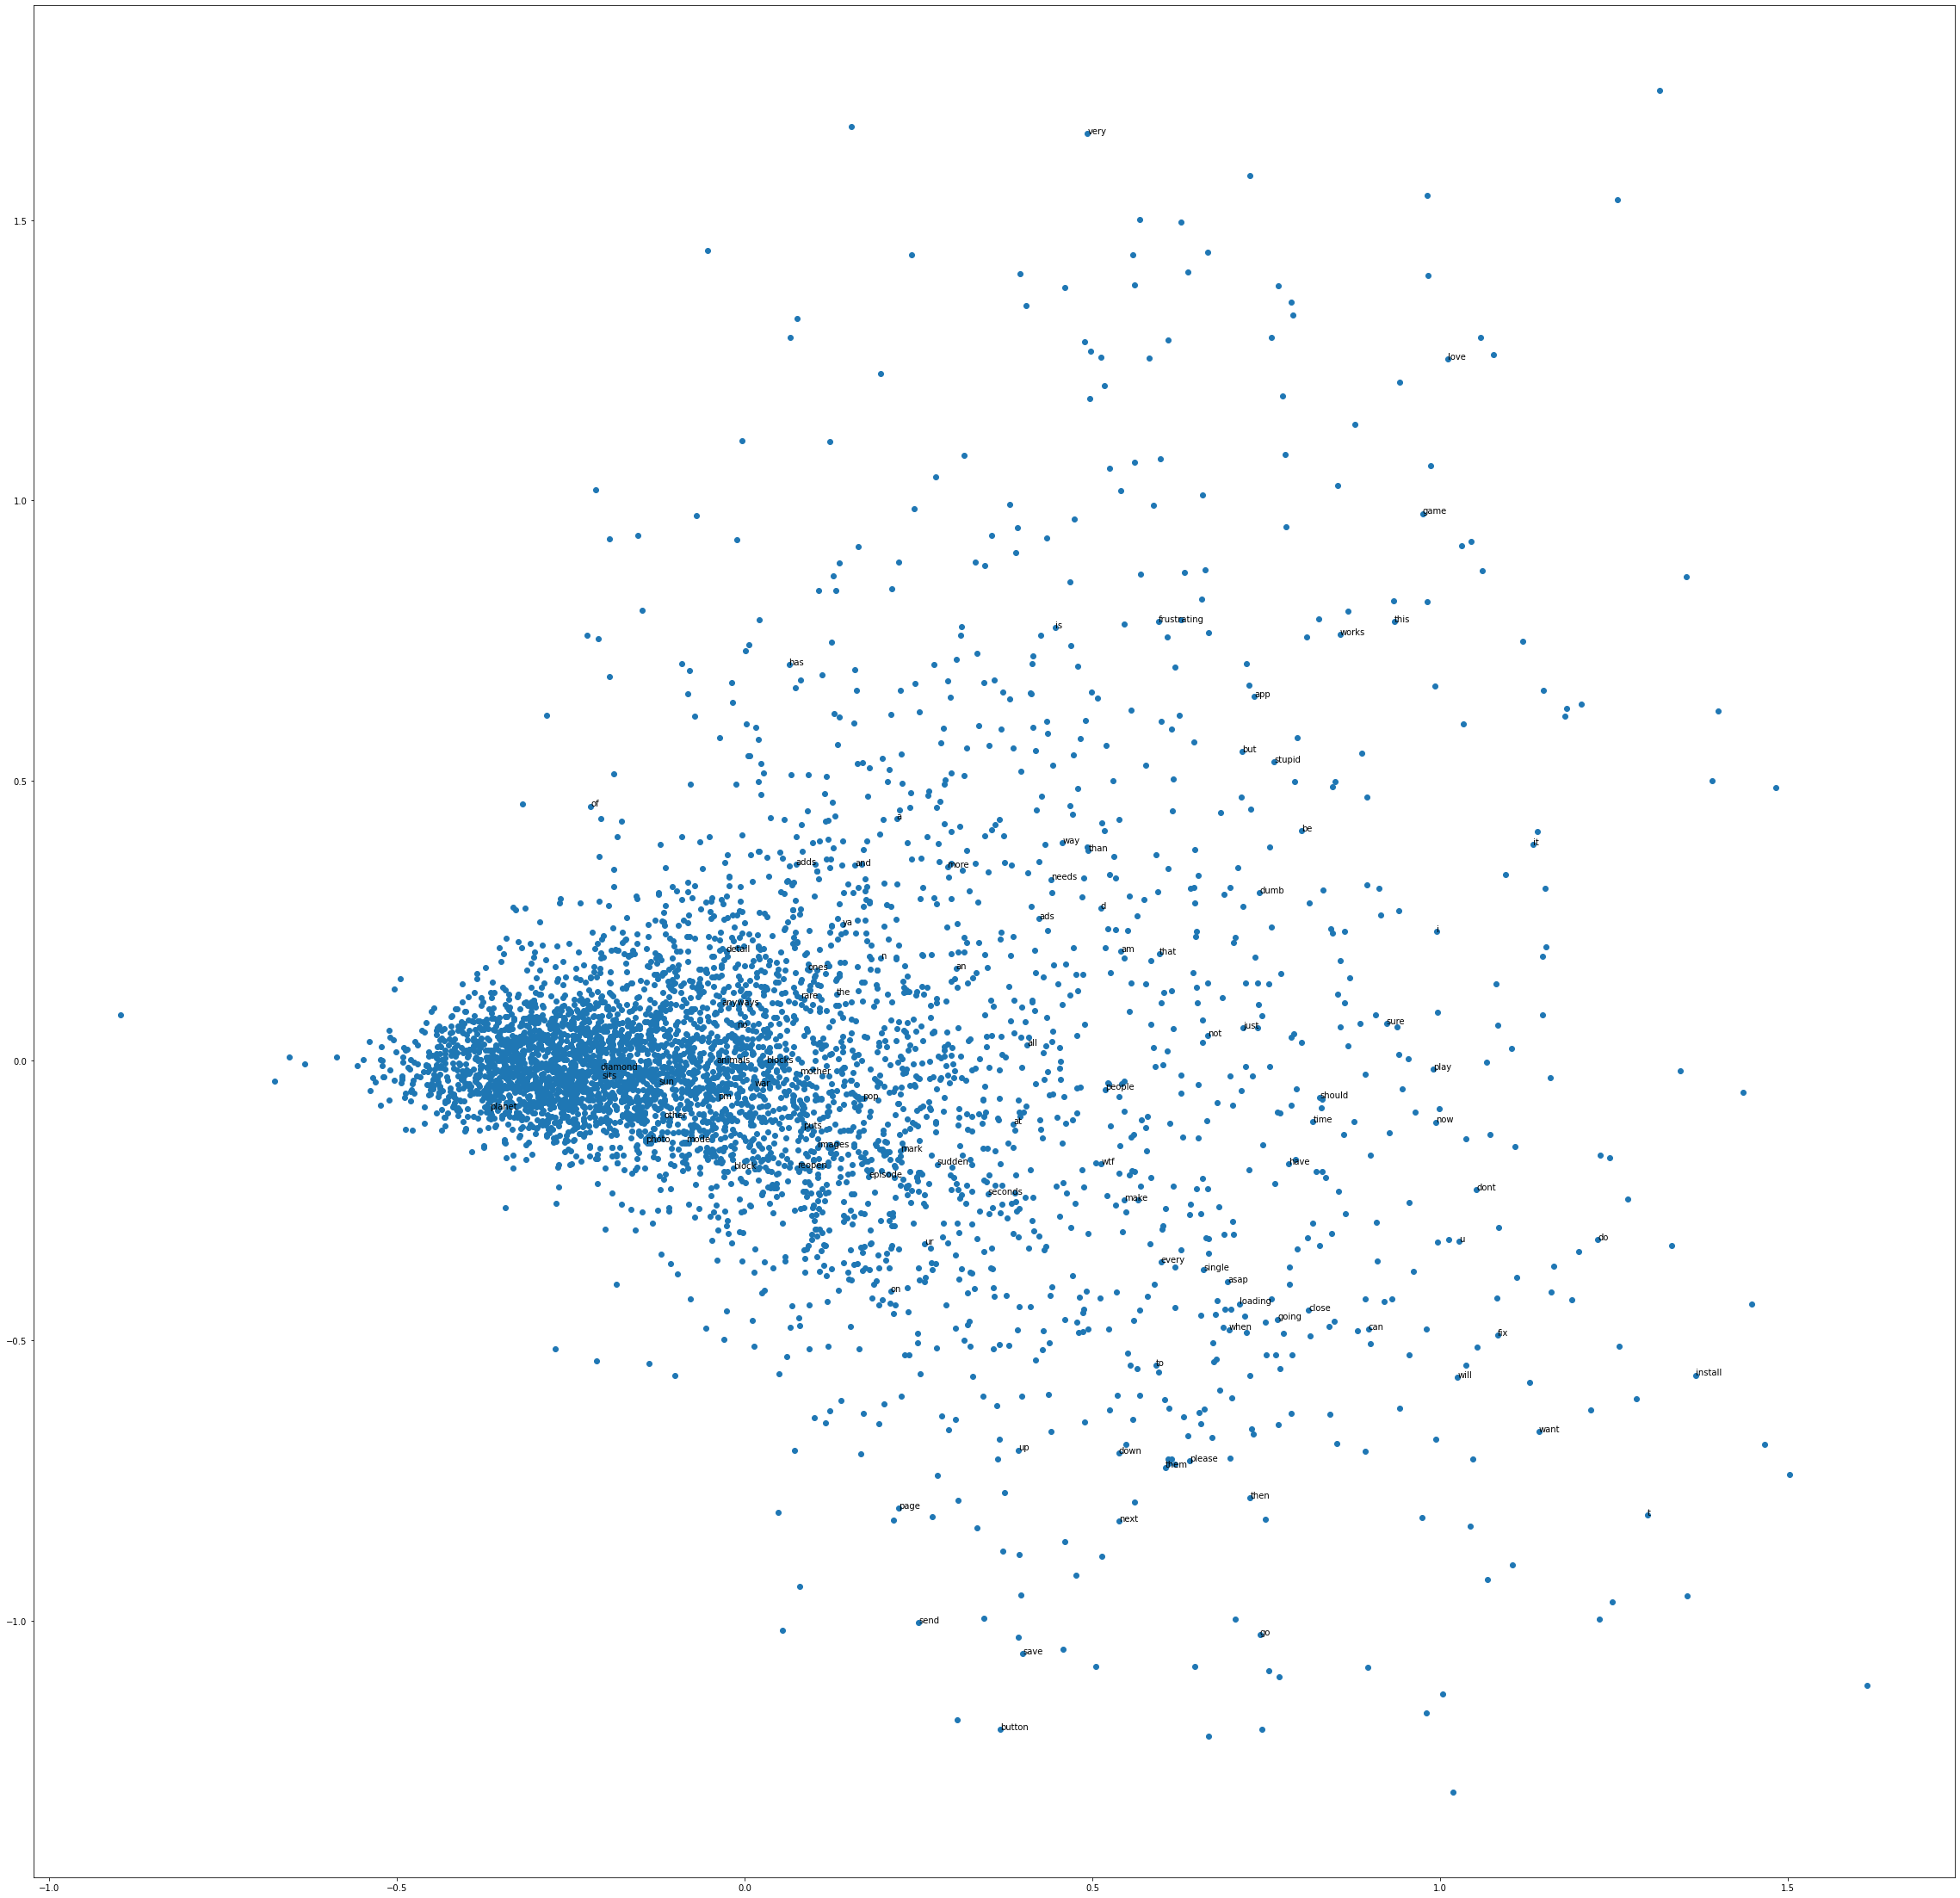

In [58]:
#Visualization 
X = model_skip.wv.__getitem__(model_skip.wv.vocab)

#create 2D models
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)
plt.figure(figsize=(40,40))
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.vocab)
for i,word in enumerate(words_skip[:100]):
    plt.annotate(s=word, xy=(result[i,0], result[i,1]))
plt.show()

### Using Pre-trained models
So how can we build a better word embedding model ? don’t worry , we can utilize already trained models. Here we are using 2 most popular pre-trained word embedding models. We  don't explain about these pre-trained models in detail, but tell how to use them. 


In [59]:
#Google word2vec
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [62]:
result = model.most_similar(positive=['women', 'king'], 
                             negative=['man'], 
                             topn=1
                            )
print(result)

[('queen', 0.4827325940132141)]


In [65]:
#Stanford Glove Embedding
from gensim.scripts.glove2word2vec import glove2word2vec
#loading 100 dimension file
from gensim.models import KeyedVectors
input_file="glove.6B.100d.txt"
output_file="glove.6B.100d.txt.word2vec"

#convert input file to word2vec
glove2word2vec(input_file, word2vec_output_file=output_file)

#load word2vec file
model = KeyedVectors.load_word2vec_format(output_file, binary=False)


In [67]:

result = model.most_similar(positive=['women', 'king'], 
                             negative=['man'], 
                             topn=1
                            )
print(result)

[('queen', 0.5805264711380005)]
